In [6]:
import numpy as np
from PIL import Image, ImageDraw, ImageOps, ImageFont
import matplotlib.pyplot as plt
from IPython.display import SVG, display

In [7]:
!pip install einops drawSvg

In [8]:
!pip install scikit-image

In [9]:
from einops import rearrange
import drawSvg as draw

/Users/peterwhidden/opt/anaconda3/envs/good/lib/python3.10/site-packages/drawSvg/raster.py:18: RuntimeWarning: Failed to import CairoSVG. drawSvg will be unable to output PNG or other raster image formats. See https://github.com/cduck/drawSvg#prerequisites for more details.
Original OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: '/Users/peterwhidden/opt/anaconda3/envs/good/lib/libcairo.so.2' (no such file), '/Users/peterwhidden/opt/anaconda3/envs/good/lib/libcairo.so.2' (no such file), '/Users/peterwhidden/opt/anaconda3/envs/good/lib/python3.10/site-packages/../../libcairo.so.2' (no such file), '/Users/peterwhidden/opt/anaconda3/envs/good/lib/libcairo.so.2' (no such file), '/Users/peterwhidden/opt/anaconda3/envs/good/bin/../lib/libcairo.so.2' (no such file), 'libcairo.so.2' (no such file), '/usr/local/lib/libcairo.so.2' (no such file), 

In [10]:
from skimage.morphology import flood_fill

#flood_fill(image, (x, y), newval)

In [40]:
d = draw.Drawing(200, 100, origin='center', displayInline=False)

# Draw an irregular polygon
d.append(draw.Lines(-80, -45,
                    70, -49,
                    95, 49,
                    -90, 40,
                    close=True,
            fill='#eeee00',
            stroke='black'))

d.saveSvg('example.svg')

In [41]:
def empty_cell(dim=32):
    base = np.full((dim,dim), 255, dtype=np.uint8)
    base[0, :] = 0
    base[dim-1, :] = 0
    base[dim-1, :] = 0
    base[:, 0] = 0
    base[:, dim-1] = 0
    return base

In [42]:

(12* 110.333333) / ((11 + 13/16) / 10)

1120.8465574603176

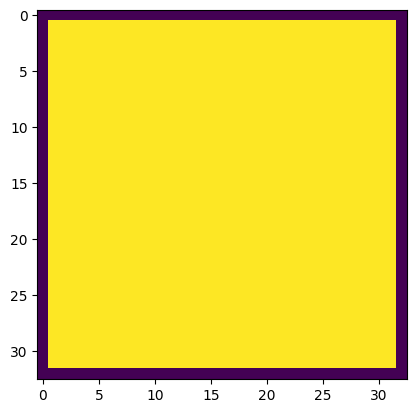

In [43]:
plt.imshow(empty_cell(33))

In [44]:
def full_cell(dim=32):
    filled = Image.fromarray(np.zeros((dim,dim), dtype=np.uint8))
    draw = ImageDraw.Draw(filled)
    s = dim
    o = 2
    stroke = 4
    ss = dim - stroke
    draw.ellipse( (0+o, 0+o, s-o, s-o), fill=(255,), outline=(0,))
    draw.ellipse( (0+o+stroke, 0+o+stroke, ss-o, ss-o), fill=(0,), outline=(0,))
    del draw
    return filled

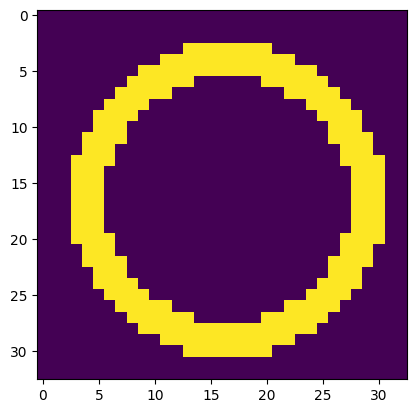

In [45]:
plt.imshow(full_cell(33))

In [69]:
img = Image.open("mask_v2.png")
im = np.array(img)[:, 1:] # np.array(img)

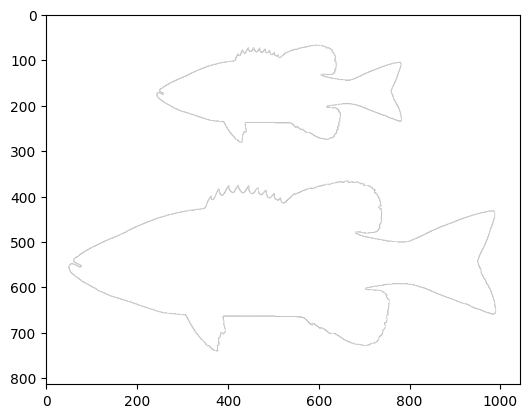

In [70]:
plt.imshow(im)

In [71]:
im.shape

(814, 1043, 4)

In [72]:
np.pad(np.array(im[:810, :1040, 3]), ((40, 40), (0,0)), 'edge').shape

(890, 1040)

In [73]:
ims = np.pad(np.array(im[:810, :1040, 3]), ((40, 40), (0,0)), 'edge') #np.array(im[:810, :1040, 3])
ims.shape

(890, 1040)

In [74]:
fill_interior = True # False# True

In [75]:
if fill_interior:
    ims = flood_fill(ims, (600,600), 255)
    ims = flood_fill(ims, (200,500), 255)

In [76]:
tile_size = 10

In [77]:
chunked = rearrange(ims, "(i x) (j y) -> i j x y ", x=tile_size, y=tile_size)

In [78]:
chunked.shape

(89, 104, 10, 10)

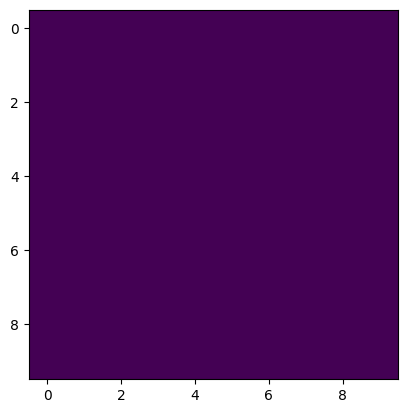

In [79]:
plt.imshow(chunked[20,5])

In [80]:
thres = 20 # 128
threshed_chunks = (chunked > thres).astype(np.uint8)
thresh_mask = (ims > thres)
thresh_chunks_mask = (chunked > thres)
threshed = (ims > thres).astype(np.uint8)

In [81]:
thresh_chunks_mask.shape

(89, 104, 10, 10)

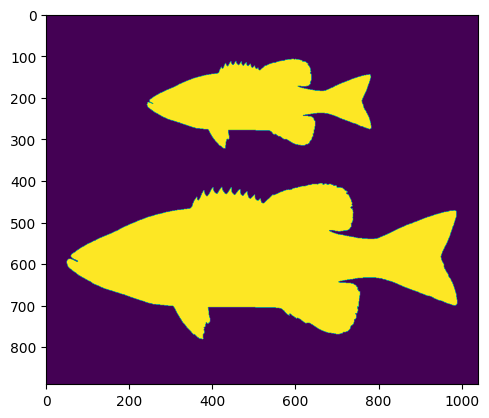

In [82]:
plt.imshow(thresh_mask)

In [83]:
thresh_chunks_mask[0][0].any()

False

In [84]:
#flooded_chunks = np.array([[chunk.any() for chunk in col] for col in thresh_chunks_mask]) # flood_fill(image, (x, y), newval)
#flooded_chunks = flood_fill(flooded_chunks, (20,50), 1)
#flooded_chunks = flood_fill(flooded_chunks, (60,60), 1)

In [85]:

#plt.imshow(flooded_chunks)

In [86]:
thresh_chunks_mask[0][0].shape

(10, 10)

In [87]:
def show_svg(path):
    display(SVG(filename=path))

In [88]:
"""
dot_count = 0
scale = 100
w = thresh_chunks_mask.shape[1]*scale
h = thresh_chunks_mask.shape[0]*scale
d = draw.Drawing(w, h, origin=(0,0), displayInline=False)
for j, col in enumerate(thresh_chunks_mask):
    for i, cell in enumerate(col):
        if cell.any():
            c_size = cell.shape
            for y, c_col in enumerate(cell):
                for x, val in enumerate(c_col):
                    xp = i*scale+x*c_size[0]
                    yp = h-(j*scale+y*c_size[1])
                    d.append(draw.Rectangle(xp-5, yp-5, 10, 10,
                        fill="none", stroke_width=0.66, stroke='black' ))
                    if val:
                        d.append(draw.Circle(xp, yp, 3,
                            fill="none", stroke_width=1, stroke='black'))
                        dot_count += 1
        #if thresh_mask[j][i]:
        #    d.append(draw.Circle(i*scale, h-j*scale, 4,
        #    fill="none", stroke_width=1.5, stroke='black'))
"""

'\ndot_count = 0\nscale = 100\nw = thresh_chunks_mask.shape[1]*scale\nh = thresh_chunks_mask.shape[0]*scale\nd = draw.Drawing(w, h, origin=(0,0), displayInline=False)\nfor j, col in enumerate(thresh_chunks_mask):\n    for i, cell in enumerate(col):\n        if cell.any():\n            c_size = cell.shape\n            for y, c_col in enumerate(cell):\n                for x, val in enumerate(c_col):\n                    xp = i*scale+x*c_size[0]\n                    yp = h-(j*scale+y*c_size[1])\n                    d.append(draw.Rectangle(xp-5, yp-5, 10, 10,\n                        fill="none", stroke_width=0.66, stroke=\'black\' ))\n                    if val:\n                        d.append(draw.Circle(xp, yp, 3,\n                            fill="none", stroke_width=1, stroke=\'black\'))\n                        dot_count += 1\n        #if thresh_mask[j][i]:\n        #    d.append(draw.Circle(i*scale, h-j*scale, 4,\n        #    fill="none", stroke_width=1.5, stroke=\'black\'))\n'

In [89]:
thresh_chunks_mask[0][0].shape[1]

10

In [90]:
dot_count = 0
disk_size = 1.125 # inches
cell_size = (11 + 13/16) / 10 # inches
wall_w = 98*12 + 8
wall_h = 85*12
print("cell size: ", cell_size)
padding = 1/16
print("padding:", padding)
chunk_size_x = thresh_chunks_mask[0][0].shape[0] * cell_size + padding
chunk_size_y = thresh_chunks_mask[0][0].shape[1] * cell_size + padding
print("chunk_size_x", chunk_size_x)
print("chunk_size_y", chunk_size_y)

w = thresh_chunks_mask.shape[1]*chunk_size_x
h = thresh_chunks_mask.shape[0]*chunk_size_y
d = draw.Drawing(w, h, origin=(0,0), displayInline=False)
# add bounding box on fish
min_x = w
max_x = 0
min_y = h
max_y = 0

for j, col in enumerate(thresh_chunks_mask):
    for i, cell in enumerate(col):
        if cell.any():
            for y, c_col in enumerate(cell):
                for x, val in enumerate(c_col):
                    xp = i*chunk_size_x + x * cell_size
                    yp = h-(j*chunk_size_y) - y * cell_size
                    d.append(draw.Rectangle(xp-0.5*cell_size, yp-0.5*cell_size, cell_size, cell_size,
                        fill="none", stroke_width=cell_size*0.008, stroke='black' ))
                    if val:
                        d.append(draw.Circle(xp, yp, disk_size*0.5,
                            fill="none", stroke_width=cell_size*0.008, stroke='black'))
                        dot_count += 1
                        min_x = min(min_x, xp)
                        max_x = max(max_x, xp)
                        min_y = min(min_y, yp)
                        max_y = max(max_y, yp)
        #if thresh_mask[j][i]:
        #    d.append(draw.Circle(i*scale, h-j*scale, 4,
        #    fill="none", stroke_width=1.5, stroke='black'))

min_x -= 0.5*cell_size
max_x += 0.5*cell_size + 1/16
min_y -= 0.5*cell_size
max_y += 0.5*cell_size + 1/16
bounding_fish_width = max_x-min_x
bounding_fish_height = max_y-min_y
print(f"min_x: {min_x}, max_x: {max_x}, min_y: {min_y}, max_y: {max_y}")
print(f"fish dims w: {bounding_fish_width}, h: {bounding_fish_height}")
print(f"wall dims w: {wall_w}, h: {wall_h}")
# draw fish bounds
d.append(
    draw.Rectangle(
        min_x, min_y, max_x-min_x, max_y-min_y,
        fill="none", stroke_width=cell_size*0.018, stroke='black'
    )
)
d.append(draw.Text('FISH BOUNDS', 18, min_x+8, min_y+8, fill='black', style="font-family: monospace"))

# draw wall
fish_center_x = 0.5*(max_x+min_x)
fish_center_y = 0.5*(max_y+min_y)
d.append(
    draw.Rectangle(
        fish_center_x-0.5*wall_w, fish_center_y-0.5*wall_h, wall_w, wall_h,
        fill="none", stroke_width=cell_size*0.018, stroke='black'
    )
)
d.append(draw.Text('WALL', 18, 
  fish_center_x-0.5*wall_w+8, fish_center_y-0.5*wall_h+8, fill='black', style="font-family: monospace"))
print(f"x margins: {0.5*(wall_w-(max_x-min_x))}, y margins: {0.5*(wall_h-(max_y-min_y))}")
print("dot count:", dot_count)

cell size:  1.18125
padding: 0.0625
chunk_size_x 11.875
chunk_size_y 11.875
min_x: 58.784375, max_x: 1175.034375, min_y: 128.853125, max_y: 929.328125
fish dims w: 1116.25, h: 800.475
wall dims w: 1184, h: 1020
x margins: 33.875, y margins: 109.76249999999999
dot count: 268448


In [91]:
d.saveSvg("test_fish.svg")

In [92]:
33.875 * 2 + 1116.25

1184.0

In [93]:
wall_w

1184

In [147]:
wall_w/12

98.66666666666667

In [145]:
100.3125 * 2 + 819.375

1020.0

In [146]:
wall_h

1020

In [148]:
wall_h / 12

85.0

In [53]:
d = draw.Drawing(10, 10, origin=(0,0), displayInline=False)
d.append(draw.Rectangle(5-0.5*cell_size, 5-0.5*cell_size, cell_size, cell_size,
                        fill="none", stroke_width=cell_size*0.008, stroke='black' ))
d.append(draw.Circle(5, 5, disk_size*0.5,
                            fill="none", stroke_width=cell_size*0.008, stroke='black'))
d.saveSvg("test_disk.svg")

In [35]:
show_svg("test_disk.svg")

In [28]:
threshed_chunks.shape

(89, 104, 10, 10)

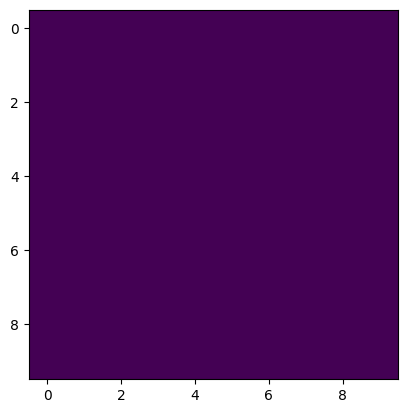

In [29]:
plt.imshow(np.array(threshed_chunks[20,5]))

In [30]:
size = 33
empty_c = np.array(empty_cell(size), dtype=np.uint8)
full_c = np.array(full_cell(size), dtype=np.uint8)

In [22]:
font = ImageFont.truetype("MaisonNeue-Demi.otf", 90, encoding="unic")

In [23]:
cells = []
empty_tiles = np.tile(empty_c, (tile_size, tile_size))
id = 0
for j, col in enumerate(threshed_chunks):
    for i, cell in enumerate(col):
        s = cell.sum()
        if s > 0:
            render = empty_tiles - np.kron(cell, full_c)
            img = Image.fromarray(np.ones_like(render)*255)
            draw = ImageDraw.Draw(img)
            draw.text((size*5-100, 10), f"id:{id}", 
              fill=(0), font=font, spacing=0, align="left")
            draw.text((size*5-100, 110), f"x:{i}", 
              fill=(0), font=font, spacing=0, align="left")
            draw.text((size*5-100, 210), f"y:{j}", 
              fill=(0), font=font, spacing=0, align="left")
            label_render = np.array(img)
            del draw
            cells.append({"x": i, "y": j, "id": id, "render": render, 
                          "label_render": label_render, "cells": cell})
            id += 1
len(cells)

559

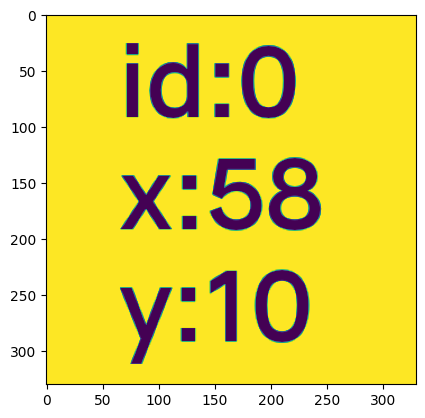

In [24]:
plt.imshow(cells[0]["label_render"])

In [25]:
fs = threshed_chunks.shape
sc = tile_size*size
full = np.full((fs[0]*sc,fs[1]*sc), 255, dtype=np.uint8)
 
for y in range(fs[0]):
  full[max(y*sc-1,0):y*sc+1, :] = 0
for x in range(fs[1]):
  full[:, max(x*sc-1,0):x*sc+1] = 0

In [26]:
for cell in cells:
  full[cell["y"]*sc:(cell["y"]+1)*sc, cell["x"]*sc:(cell["x"]+1)*sc] = cell["render"]

In [27]:
for y in range(0, fs[0], 2):
  full[max(y*sc-1,0):(y+1)*sc+1, :] -= np.minimum(12, full[max(y*sc-1,0):(y+1)*sc+1, :])
for x in range(0, fs[1], 2):
  full[:, max(x*sc-1,0):(x+1)*sc+1] -= np.minimum(12, full[:, max(x*sc-1,0):(x+1)*sc+1])

for y in range(0, fs[0], 10):
  full[max(y*sc-1,0):(y+1)*sc+1, :] -= np.minimum(12, full[max(y*sc-1,0):(y+1)*sc+1, :])
for x in range(0, fs[1], 10):
  full[:, max(x*sc-1,0):(x+1)*sc+1] -= np.minimum(12, full[:, max(x*sc-1,0):(x+1)*sc+1])

In [28]:
labels_full = np.full((fs[0]*sc,fs[1]*sc), 255, dtype=np.uint8)
for cell in cells:
    labels_full[cell["y"]*sc:(cell["y"]+1)*sc, cell["x"]*sc:(cell["x"]+1)*sc] = cell["label_render"]

In [29]:
labels_full_img = Image.fromarray(labels_full)
labels_full_img.save("fish/labels_full_fish.jpg")

In [30]:
full_img = Image.fromarray(full)

In [31]:
font_large = ImageFont.truetype("MaisonNeue-Mono.otf", 192, encoding="unic")

In [32]:
draw = ImageDraw.Draw(full_img)
for y in range(1, fs[0]-1):
  draw.text((60, y*sc+30), f"{y}", 
    fill=(0), font=font_large, align="left")
  draw.text((full.shape[1]-sc+40, y*sc+40), f"{y}", 
    fill=(0), font=font_large, align="left")
for x in range(1, fs[1]-1):
  draw.text((x*sc+40, 60), f"{x}",
    fill=(0), font=font_large, align="left")
  draw.text((x*sc+40, full.shape[0]-sc+40), f"{x}", 
    fill=(0), font=font_large, align="left")
del draw


In [33]:
!mkdir -p fish/tiles

In [34]:
full_img.save("fish/full_fish.jpg")

In [35]:
np.zeros((full.shape[0], full.shape[1], 4)).shape
labels_full

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [36]:
font_sm = ImageFont.truetype("MaisonNeue-Demi.otf", 40, encoding="unic")

In [37]:
for idx, cell in enumerate(cells):
  tile = np.full((sc+100, sc+100), 255, dtype=np.uint8)
  tile[80:80+sc, 80:80+sc] = cell["render"]
  img = Image.fromarray(tile)
  draw = ImageDraw.Draw(img)
  draw.text((15, 15), f"id:{cell['id']} x:{cell['x']} y:{cell['y']}", 
    fill=(0), font=font_sm, spacing=0, align="left")
  del draw
  num = str(idx).zfill(4)
  img.save(f"fish/tiles/tile_{num}.jpg")

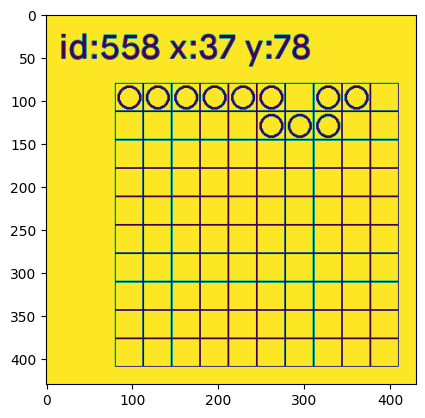

In [38]:
plt.imshow(img)

In [39]:
#!rm fish.zip
#!zip -rq fish.zip fish
#!rm -r fish
#!du -h fish.zip